# Predictive Analytics: Prediksi Pembatalan Transaksi pada E-commerce UK


---

Oleh: Noer Hanifah Suganda


Perusahaan e-commerce UK yang berbasis di London telah beroperasi sejak tahun 2007 dan menawarkan produk-produk seperti hadiah dan homewares untuk berbagai kalangan. Setiap hari, perusahaan mencatat ratusan hingga ribuan transaksi yang menghasilkan pendapatan harian. Namun, pendapatan harian ini tidak selalu stabil—terdapat fluktuasi yang signifikan akibat faktor musiman, promosi, dan masalah ketersediaan stok. Variasi pendapatan yang tidak terduga dapat mengganggu perencanaan inventori dan strategi pemasaran, sehingga mengakibatkan kerugian finansial dan penurunan kepuasan pelanggan.

Untuk mengatasi tantangan ini, perusahaan membutuhkan sebuah sistem prediktif yang dapat meramalkan total pendapatan harian secara akurat supaya perusahaan dapat mengantisipasi hari-hari dengan pendapatan yang rendah dan mengambil tindakan preventif, seperti menyesuaikan persediaan atau merubah strategi pemasaran, sehingga operasional dapat dioptimalkan dan risiko kerugian dapat diminimalkan.










#B. Business Understanding

Dalam dunia e-commerce, menjaga pendapatan harian itu sangat penting. Pendapatan harian yang fluktuatif dapat membuat perusahaan kesulitan dalam mengelola stok, mengatur promosi, dan merencanakan operasional. Jika perusahaan dapat mengetahui kapan pendapatan cenderung turun atau naik, mereka bisa lebih cepat merespons—misalnya, dengan menambah stok atau menyesuaikan promosi—sehingga kerugian dapat diminimalkan dan kesempatan penjualan dapat dimaksimalkan.

**Problem Statement:**

- Bagaimana membangun model prediktif berbasis time series untuk meramalkan total pendapatan harian (daily revenue) dari transaksi e-commerce?
- Model yang seperti apa yang memiliki akurasi paling baik?

**Goals**

- Mengembangkan model forecasting yang dapat memprediksi pendapatan penjualan harian dengan akurasi yang terukur menggunakan metrik Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE).
- Membandingkan beberapa algoritma model untuk menemukan akurasi terbaik dalam memprediksi pendapatan penjualan harian.

**Solution Statement**
Untuk meramalkan total pendapatan harian (daily revenue) dari transaksi e-commerce, saya menggunakan tiga pendekatan solusi, masing-masing dengan metrik evaluasi terukur (seperti MAE, RMSE, dan MAPE) sehingga solusi yang dihasilkan dapat dinilai secara objektif.

- Menggunakan model ARIMA untuk memodelkan data time series secara univariat. ARIMA memanfaatkan pola historis revenue untuk menangkap tren dan musiman secara langsung melalui parameter (p, d, q). ARIMA memberikan model time series klasik yang mengandalkan pola historis secara langsung.

- Menggunakan Random Forest Regressor untuk forecasting revenue harian dengan memanfaatkan fitur-fitur hasil rekayasa (lag revenue, moving averages, dll.). Pendekatan ini memungkinkan model menangkap hubungan non-linear dan interaksi antar fitur yang mungkin tidak dapat ditangkap oleh model time series tradisional.


- Mengembangkan model deep learning berbasis LSTM yang dirancang untuk menangkap ketergantungan jangka panjang dalam data time series. Pendekatan ini efektif jika pola revenue harian memiliki dinamika non-linear yang kompleks.



## Data Loading

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

df = pd.read_csv('Sales Transaction.csv')
print("Dataset Sales Transaction:")
print(df.head())


Dataset Sales Transaction:
  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom  


# C. Exploratory Data Analysis (EDA)

## EDA - Deskripsi Variabel

In [ ]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


Dataset ini memiliki lebih dari 500.000 baris data dan 8 kolom. Berikut adalah deskripsi masing-masing kolom:


1.   **TransactionNo** (kategorikal):
Merupakan nomor unik enam digit yang mendefinisikan setiap transaksi. Jika terdapat huruf "C" pada kode, artinya transaksi tersebut merupakan pembatalan
2. **Date** (numerik):
Menunjukkan tanggal saat transaksi terjadi.
3. **ProductNo** (kategorikal):
Karakter unik yang terdiri dari lima atau enam digit, digunakan untuk mengidentifikasi produk tertentu.
4. **Product** (kategorikal):
Nama produk atau barang yang dijual.
5. **Price** (numerik):
Harga per unit dari masing-masing produk, dihitung dalam pound sterling (£).
6. **Quantity** (numerik):
Jumlah produk yang dibeli dalam setiap transaksi. Nilai negatif menunjukkan transaksi yang dibatalkan.
7. **CustomerNo** (kategorikal):
Nomor unik yang terdiri dari lima digit untuk mengidentifikasi setiap pelanggan.
8. **Country** (kategorikal):
Nama negara di mana pelanggan tersebut berada.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


Dari eksekusi method df.info() terdapat:


*   Terdapat 2 kolom numerik dengan tipe data float64 yaitu: Price dan CustomerNo.

*   Terdapat 5 kolom dengan tipe data object yaitu: TransactionNo, Date, ProductNo, ProductName, dan Country.

**Findings:**
*   Meskipun deskripsinya adalah "Date (numeric)" dalam penjelasan, data yang muncul berbentuk string (misalnya, "12/9/2019"). Agar dapat melakukan operasi tanggal (seperti filtering berdasarkan waktu, ekstraksi bulan/tahun, dsb.), maka akan dikonversi ke tipe datetime menggunakan pd.to_datetime().
*   CustomerNo (float64):
Meskipun disimpan sebagai float64, biasanya lebih tepat jika diubah menjadi tipe object atau string (atau integer jika tidak ada nilai hilang) untuk menghindari perlakuan numerik yang tidak diinginkan. Ada beberapa nilai yang hilang (536295 non-null dari 536350).



In [ ]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:


*   Count  adalah jumlah sampel pada data.
Mean adalah nilai rata-rata.

*   Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama.
- Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## EDA - Menangani Duplikasi, Missing Value, Perubahan Tipe Data dan Outliers

## **Menangani Duplikasi**

In [ ]:
df.duplicated().sum()

np.int64(5200)

Output df.duplicated().sum() menghasilkan nilai 5200, yang berarti ada 5200 baris dalam DataFrame yang teridentifikasi sebagai duplikat. Maka perlu kita hapus.

In [ ]:
df_noduplicates = df.drop_duplicates()

In [ ]:
df_noduplicates

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


Dataset sudah berkurang karena duplikatnya telat dihapus




## **Menangani Missing Values**

In [ ]:
df_noduplicates.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,55
Country,0


In [ ]:
data_miss = df_noduplicates[df_noduplicates.isnull().any(axis=1)]
data_miss

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


Ditemukan 55 baris Null pada kolom CustomerNo. Maka akan kita hapus.:

In [ ]:
df_noduplicates.dropna(inplace=True)
df_noduplicates.isnull().sum().sum()

<ipython-input-10-ab5597ce184c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noduplicates.dropna(inplace=True)


np.int64(0)

In [ ]:
df_noduplicates.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,0
Country,0


Sudah tidak ada missing value

## **Menangani Tipe Data yang Tidak Sesuai**

In [ ]:
df_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  531095 non-null  object 
 1   Date           531095 non-null  object 
 2   ProductNo      531095 non-null  object 
 3   ProductName    531095 non-null  object 
 4   Price          531095 non-null  float64
 5   Quantity       531095 non-null  int64  
 6   CustomerNo     531095 non-null  float64
 7   Country        531095 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


- Kolom CustomerNo seharusnya berisi nilai unik yang mengidentifikasi masing-masing pelanggan. Maka akan diubah menjadi string yang lebih tepat.
- Meskipun deskripsinya adalah "Date (numeric)" dalam penjelasan, data yang muncul berbentuk string (misalnya, "12/9/2019"). Agar dapat melakukan operasi tanggal (seperti filtering berdasarkan waktu, ekstraksi bulan/tahun, dsb.)

In [ ]:
df_noduplicates['Date'] = pd.to_datetime(df_noduplicates['Date'], format='%m/%d/%Y')


<ipython-input-13-53c3ed933e24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noduplicates['Date'] = pd.to_datetime(df_noduplicates['Date'], format='%m/%d/%Y')


konversi kolom Date ke tipe datetime menggunakan pd.to_datetime().

In [ ]:
df_noduplicates['CustomerNo'] = df_noduplicates['CustomerNo'].astype(str)


<ipython-input-14-1434ad4dd119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noduplicates['CustomerNo'] = df_noduplicates['CustomerNo'].astype(str)


Konversi CustomerNo ke tipe string

In [ ]:
df_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  object        
 7   Country        531095 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.5+ MB


kolom Date sudah berubah tipe datanya ke datetime, dan kolom CustomerNo berubah ke object dengan isi String di dalamnya

## **Menangani Outliers**

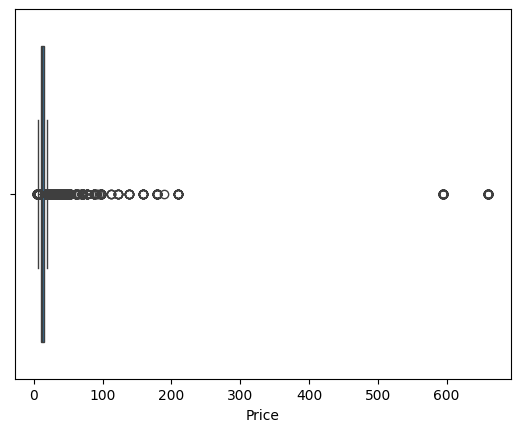

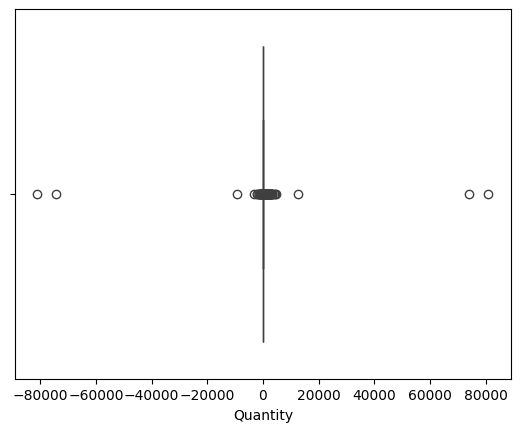

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_outlier=df_noduplicates.select_dtypes(exclude=['object', 'datetime64[ns]'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

### Outliers Gabungan AND

In [ ]:
# Menghitung IQR untuk kolom Price
Q1_price = df_noduplicates['Price'].quantile(0.25)
Q3_price = df_noduplicates['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Menghitung IQR untuk kolom Quantity
Q1_qty = df_noduplicates['Quantity'].quantile(0.25)
Q3_qty = df_noduplicates['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty


In [ ]:
# Mask outlier untuk Price
mask_price = (df_noduplicates['Price'] < lower_bound_price) | (df_noduplicates['Price'] > upper_bound_price)

# Mask outlier untuk Quantity
mask_qty = (df_noduplicates['Quantity'] < lower_bound_qty) | (df_noduplicates['Quantity'] > upper_bound_qty)

# Mask gabungan: hanya baris yang outlier di kedua kolom
mask_intersection = mask_price & mask_qty

# Menampilkan jumlah baris yang dianggap outlier gabungan
print("Jumlah outlier (gabungan Price & Quantity):", mask_intersection.sum())


Jumlah outlier (gabungan Price & Quantity): 5795


In [ ]:
# Membuat dataset baru tanpa baris outlier gabungan
df_intersect = df_noduplicates[~mask_intersection].copy()

print("Ukuran dataset sebelum penghapusan:", df_noduplicates.shape)
print("Ukuran dataset sesudah penghapusan:", df_intersect.shape)


Ukuran dataset sebelum penghapusan: (531095, 8)
Ukuran dataset sesudah penghapusan: (525300, 8)


### Outliers Gabungan AND & OR

In [ ]:
# Untuk kolom Price
price_q1 = df_noduplicates['Price'].quantile(0.25)
price_q3 = df_noduplicates['Price'].quantile(0.75)
price_iqr = price_q3 - price_q1
price_lower_bound = price_q1 - 1.5 * price_iqr
price_upper_bound = price_q3 + 1.5 * price_iqr

# Buat mask untuk Price
price_mask = (df_noduplicates['Price'] >= price_lower_bound) & (df_noduplicates['Price'] <= price_upper_bound)

# Hitung jumlah outlier pada Price
price_outliers_count = df_noduplicates[~price_mask].shape[0]
print("Jumlah outliers pada Price:", price_outliers_count)

# Untuk kolom Quantity
quantity_q1 = df_noduplicates['Quantity'].quantile(0.25)
quantity_q3 = df_noduplicates['Quantity'].quantile(0.75)
quantity_iqr = quantity_q3 - quantity_q1
quantity_lower_bound = quantity_q1 - 1.5 * quantity_iqr
quantity_upper_bound = quantity_q3 + 1.5 * quantity_iqr

# Buat mask untuk Quantity
quantity_mask = (df_noduplicates['Quantity'] >= quantity_lower_bound) & (df_noduplicates['Quantity'] <= quantity_upper_bound)

# Hitung jumlah outlier pada Quantity
quantity_outliers_count = df_noduplicates[~quantity_mask].shape[0]
print("Jumlah outliers pada Quantity:", quantity_outliers_count)

# Gabungkan kedua mask (jika diperlukan)
combined_mask = price_mask & quantity_mask

# Data tanpa outlier berdasarkan gabungan mask
df_no_outliers = df_noduplicates[combined_mask]

# Tampilkan perbandingan dimensi data
print("Dimensi data sebelum menghapus outlier:", df_noduplicates.shape)
print("Dimensi data setelah menghapus outlier:", df_no_outliers.shape)


Jumlah outliers pada Price: 98356
Jumlah outliers pada Quantity: 57243
Dimensi data sebelum menghapus outlier: (531095, 8)
Dimensi data setelah menghapus outlier: (381291, 8)


## EDA - Univariate Analysis

Membagi kolom dataset menjadi dua kelompok: fitur numerik dan fitur kategorik.

In [ ]:
# Fitur numerik: Price dan Quantity
numeric_features = ['Price', 'Quantity', 'Date']

# Fitur kategorik: sisanya (TransactionNo, ProductNo, ProductName, CustomerNo, Country)
categorical_features = ['TransactionNo', 'ProductNo', 'ProductName', 'CustomerNo', 'Country']

print("Fitur Numerik:", numeric_features)
print("Fitur Kategorik:", categorical_features)

Fitur Numerik: ['Price', 'Quantity', 'Date']
Fitur Kategorik: ['TransactionNo', 'ProductNo', 'ProductName', 'CustomerNo', 'Country']


## **Analisis Fitur Numerik**

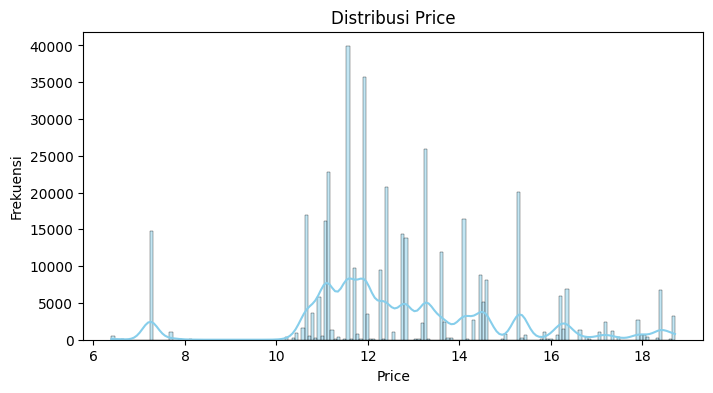

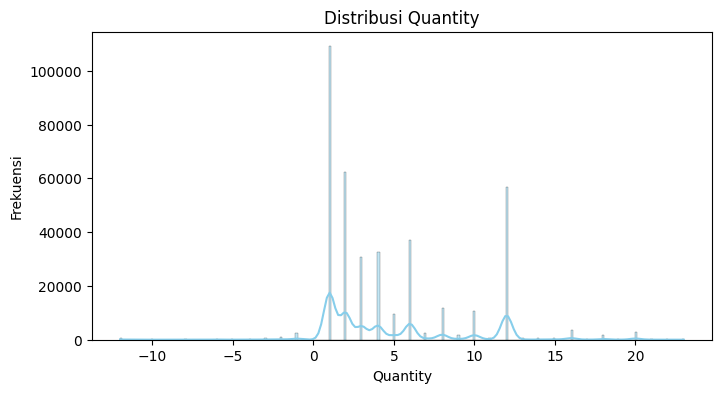

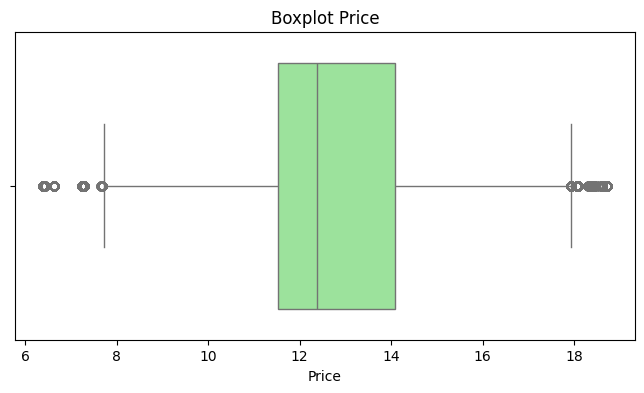

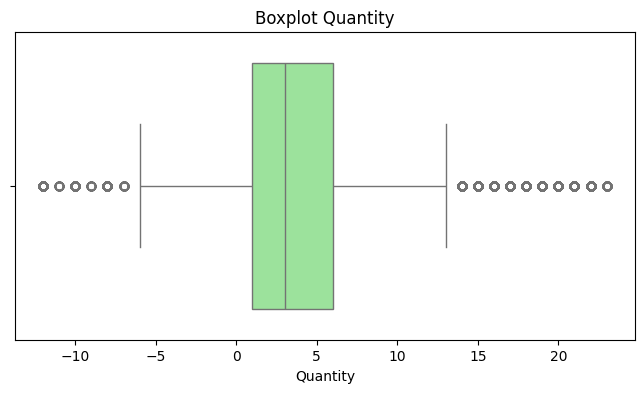

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk Price dan Quantity
for col in ['Price', 'Quantity']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_no_outliers[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Boxplot untuk Price dan Quantity
for col in ['Price', 'Quantity']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_no_outliers[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.show()


<ipython-input-23-26c164048282>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Date_numeric'] = df_no_outliers['Date'].apply(lambda x: x.toordinal())


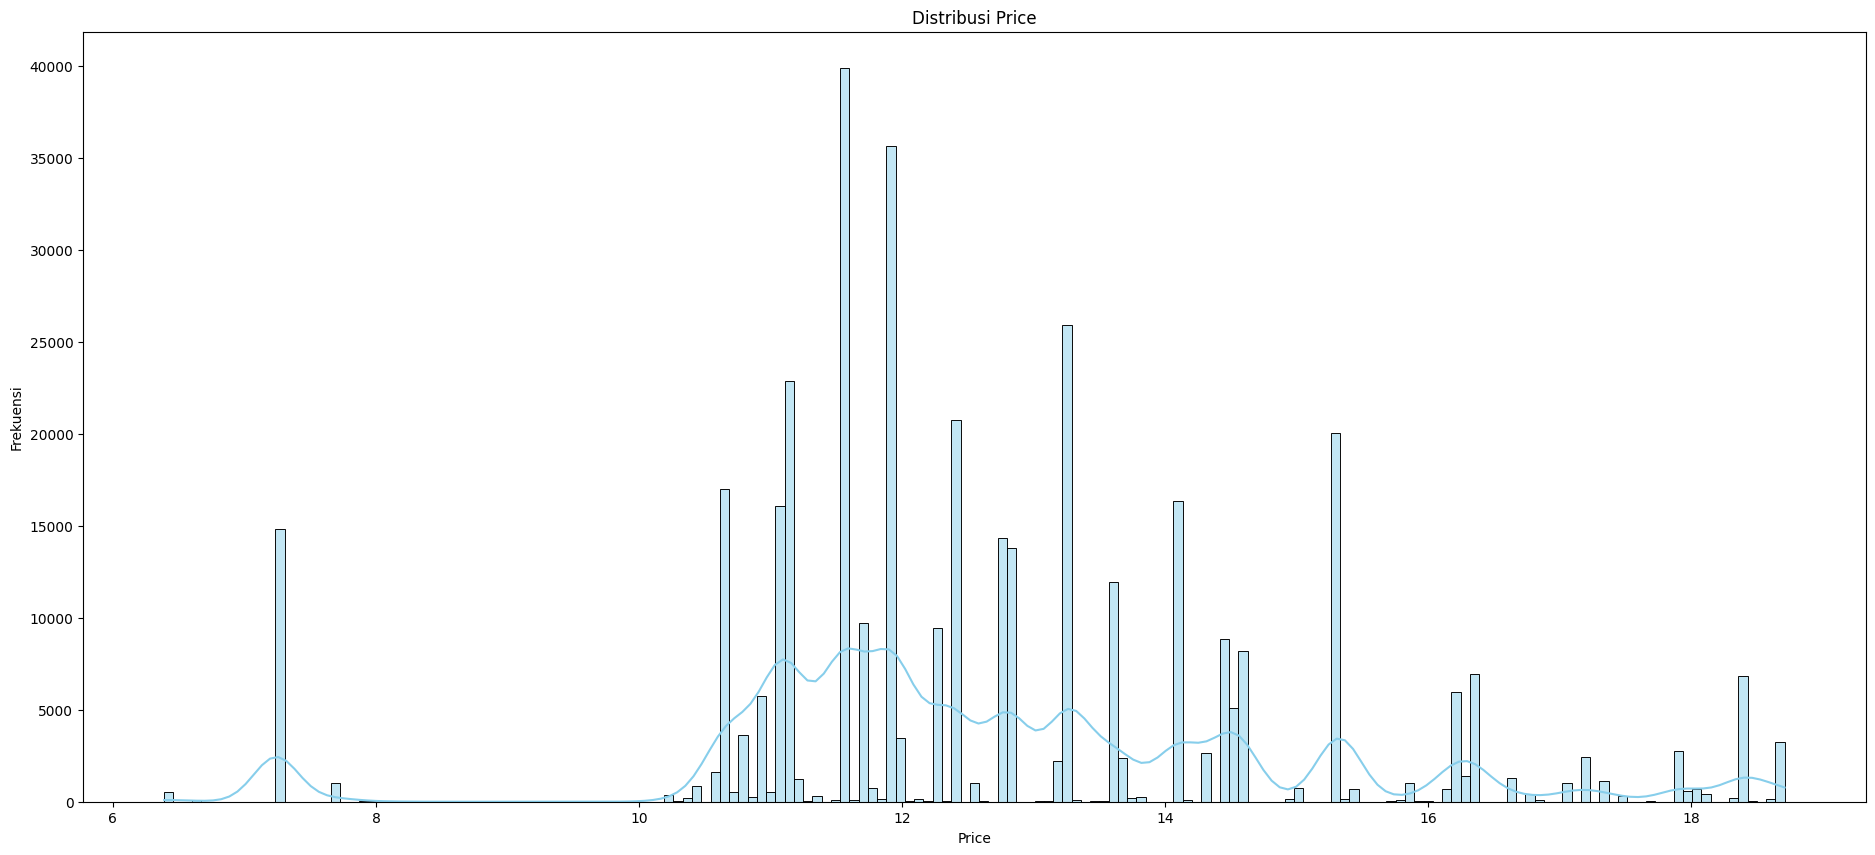

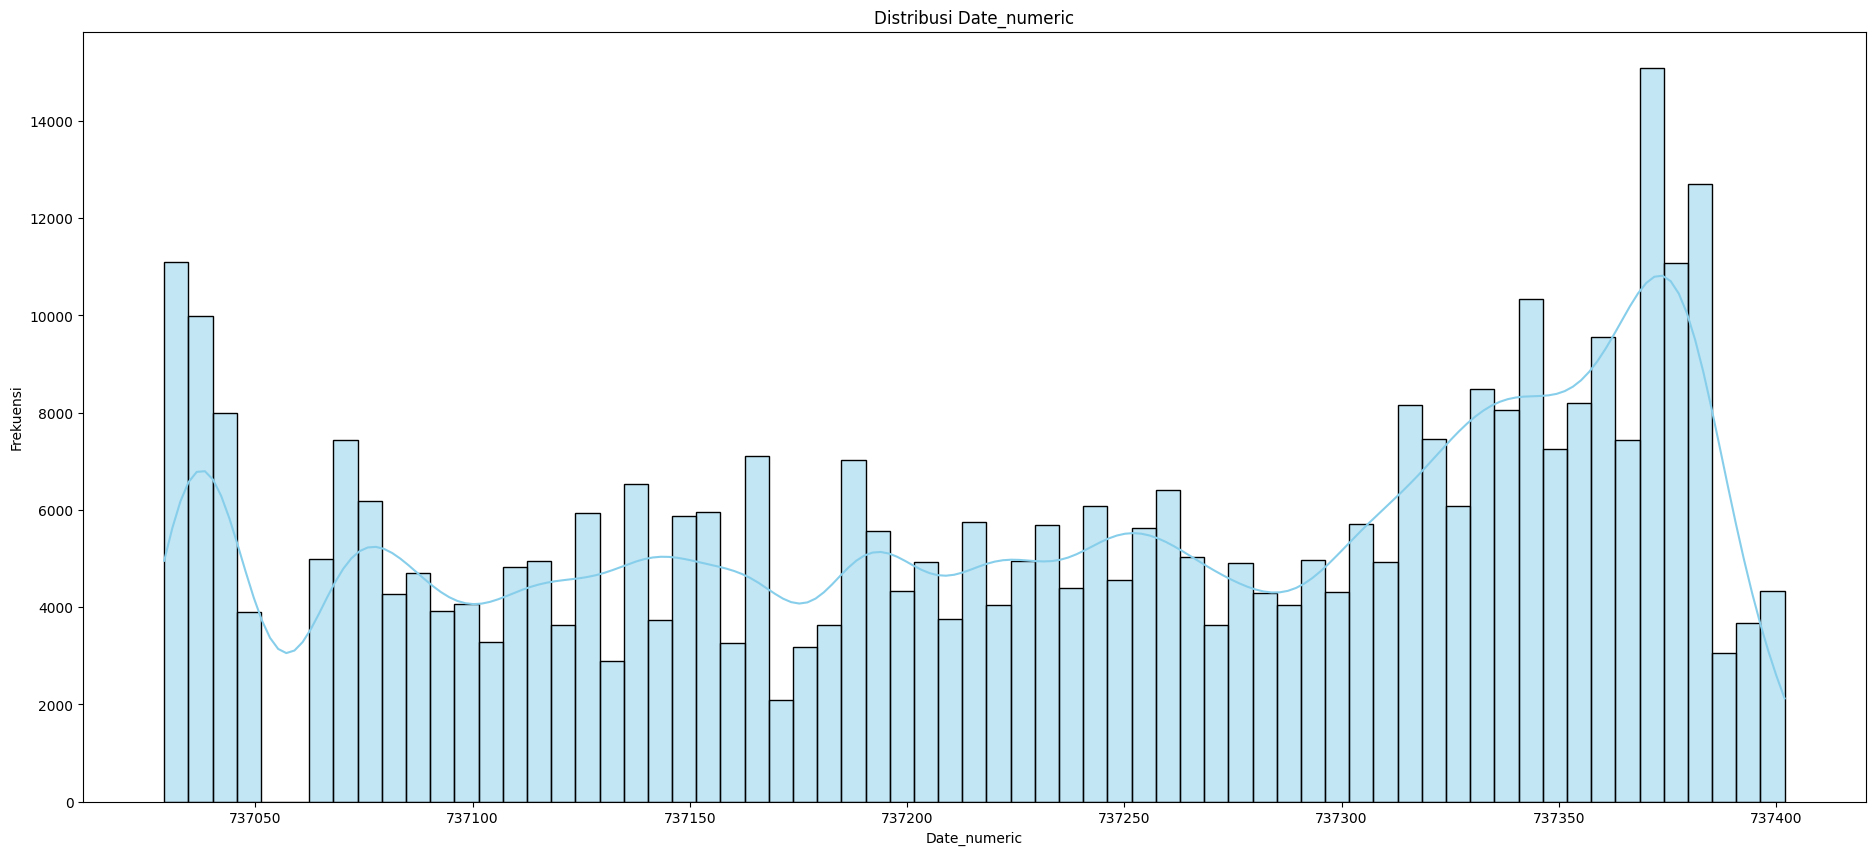

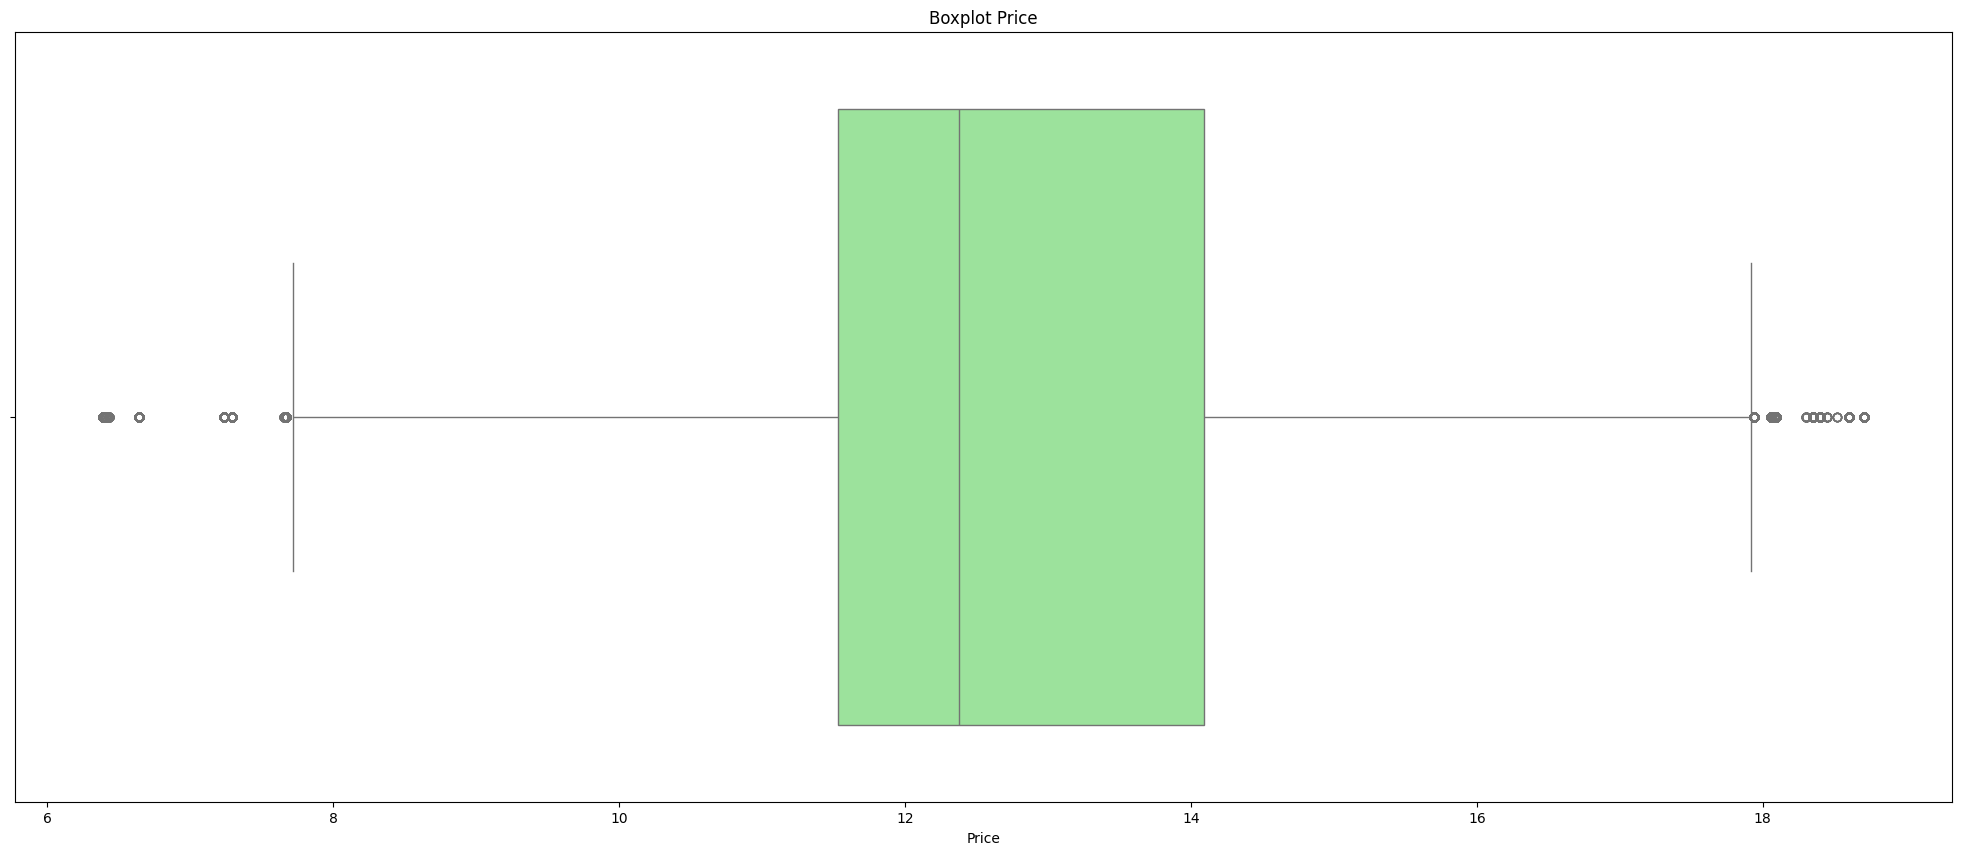

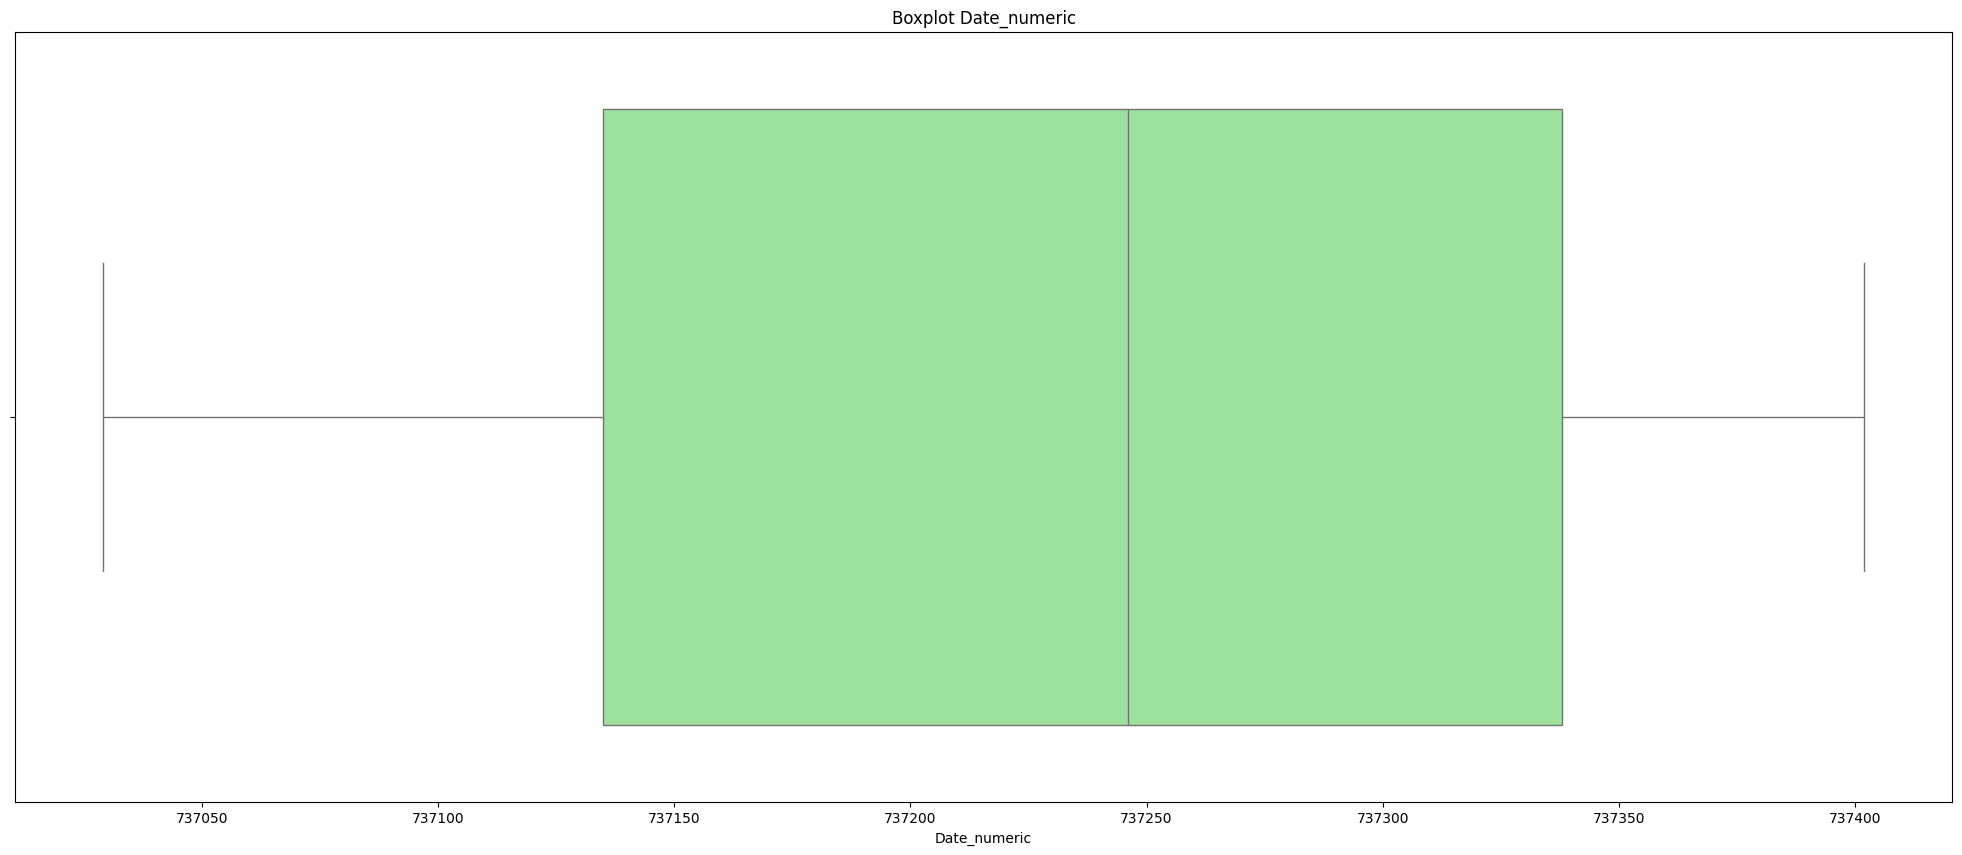

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom Date ke numeric (ordinal)
df_no_outliers['Date_numeric'] = df_no_outliers['Date'].apply(lambda x: x.toordinal())

# Histogram untuk Price dan Date_numeric
for col in ['Price', 'Date_numeric']:
    plt.figure(figsize=(23, 10))
    sns.histplot(df_no_outliers[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Boxplot untuk Price dan Date_numeric
for col in ['Price', 'Date_numeric']:
    plt.figure(figsize=(25, 10))
    sns.boxplot(x=df_no_outliers[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.show()


<ipython-input-74-9eff381c601c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Revenue'] = df_no_outliers['Price'] * df_no_outliers['Quantity']


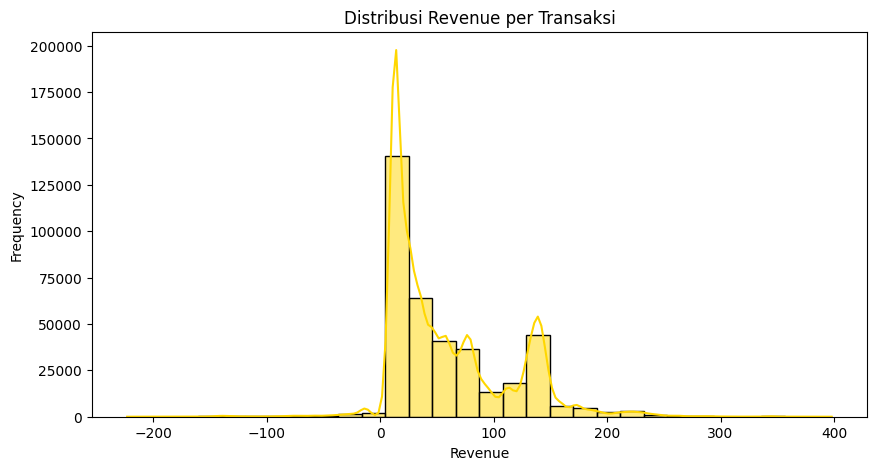

In [ ]:
# 4. Hitung Revenue Per Transaksi
# Misalnya, revenue dihitung sebagai Price * Quantity (tanpa penyesuaian cancellation)
df_no_outliers['Revenue'] = df_no_outliers['Price'] * df_no_outliers['Quantity']

plt.figure(figsize=(10,5))
sns.histplot(df_no_outliers['Revenue'], bins=30, kde=True, color='gold')
plt.title('Distribusi Revenue per Transaksi')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

## **Analisis Fitur Kategorik**

<ipython-input-24-b11a0a7d8347>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')


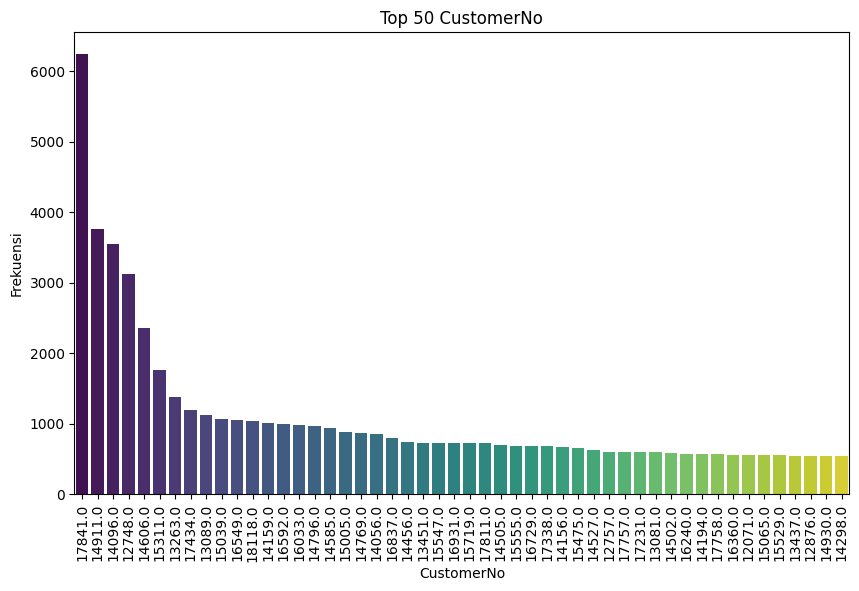

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 20 kategori terbanyak
top_15_products = df_no_outliers['CustomerNo'].value_counts().nlargest(50)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')
plt.title('Top 50 CustomerNo')
plt.xlabel('CustomerNo')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()


<ipython-input-25-36441fc05b5e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')


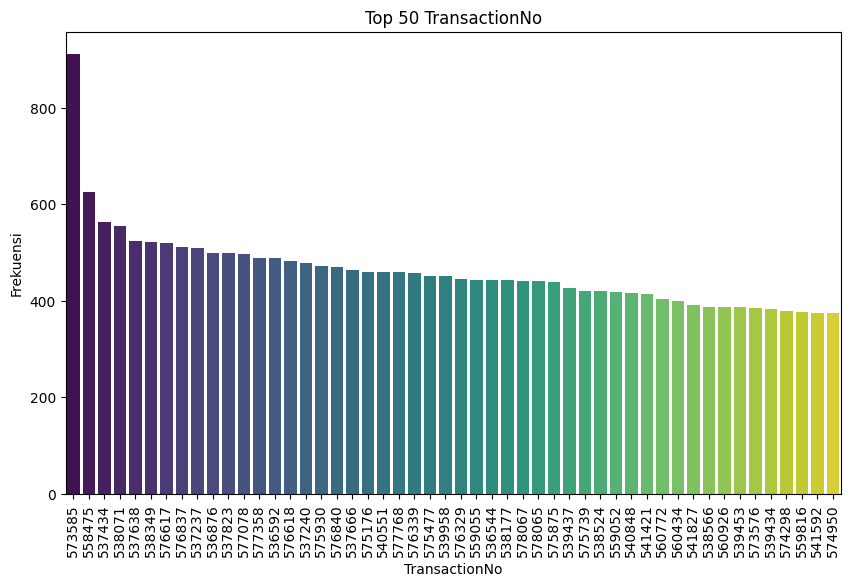

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 20 kategori terbanyak
top_15_products = df_no_outliers['TransactionNo'].value_counts().nlargest(50)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')
plt.title('Top 50 TransactionNo')
plt.xlabel('TransactionNo')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()


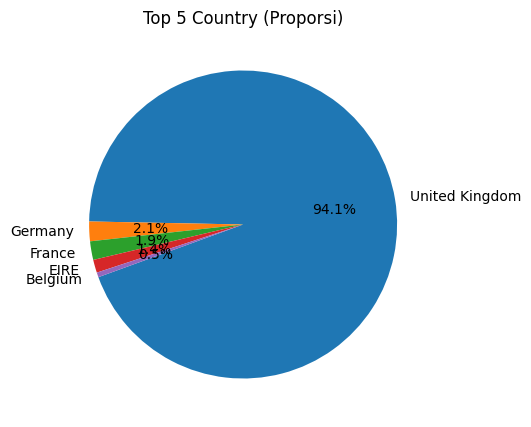

In [ ]:
top_5_products = df_no_outliers['Country'].value_counts().nlargest(5)

plt.figure(figsize=(5,5))
plt.pie(top_5_products.values, labels=top_5_products.index, autopct='%1.1f%%', startangle=200)
plt.title('Top 5 Country (Proporsi)')
plt.show()


In [ ]:
import pandas as pd

# Top 50 Produk Paling Sering Dibeli
top_50_products = df_no_outliers['ProductName'].value_counts().nlargest(50)
df_top_products = pd.DataFrame({'ProductName': top_50_products.index, 'Frekuensi': top_50_products.values})

# Top 50 CustomerNo dengan transaksi terbanyak
top_50_customers = df_no_outliers['CustomerNo'].value_counts().nlargest(50)
df_top_customers = pd.DataFrame({'CustomerNo': top_50_customers.index, 'Frekuensi': top_50_customers.values})

# Top 50 TransactionNo dengan frekuensi tertinggi
top_50_transactions = df_no_outliers['TransactionNo'].value_counts().nlargest(50)
df_top_transactions = pd.DataFrame({'TransactionNo': top_50_transactions.index, 'Frekuensi': top_50_transactions.values})

# Top 8 Negara dengan transaksi terbanyak
top_8_countries = df_no_outliers['Country'].value_counts().nlargest(8)
df_top_countries = pd.DataFrame({'Country': top_8_countries.index, 'Frekuensi': top_8_countries.values})
df_top_countries['Persentase'] = (df_top_countries['Frekuensi'] / df_no_outliers.shape[0]) * 100

# Menampilkan tabel
print("Top 50 Produk Paling Sering Dibeli:")
print(df_top_products)

print("\nTop 50 CustomerNo dengan Transaksi Terbanyak:")
print(df_top_customers)

print("\nTop 50 TransactionNo dengan Frekuensi Tertinggi:")
print(df_top_transactions)

print("\nTop 8 Negara dengan Transaksi Terbanyak:")
print(df_top_countries)


Top 50 Produk Paling Sering Dibeli:
                            ProductName  Frekuensi
0    Cream Hanging Heart T-Light Holder       1885
1                         Party Bunting       1281
2      Set Of 3 Cake Tins Pantry Design       1159
3        Natural Slate Heart Chalkboard       1155
4                Jumbo Storage Bag Suki       1073
5     Jumbo Shopper Vintage Red Paisley       1057
6         Assorted Colour Bird Ornament       1039
7       Recipe Box Pantry Yellow Design       1038
8                 Heart Of Wicker Small       1026
9     Wooden Picture Frame White Finish       1001
10               Jam Making Set Printed        976
11      Roses Regency Teacup And Saucer        969
12                       Popcorn Holder        968
13                       Spotty Bunting        967
14      Green Regency Teacup And Saucer        936
15         Set Of 4 Pantry Jelly Moulds        929
16             Alarm Clock Bakelike Red        908
17             Jam Making Set With Jars       

1. Top 50 Produk Paling Sering Dibeli
Frekuensi Tinggi pada Produk Tertentu:
Produk seperti Cream Hanging Heart T-Light Holder muncul dengan frekuensi 1885, diikuti oleh Party Bunting (1281) dan Set Of 3 Cake Tins Pantry Design (1159). Ini menunjukkan bahwa ada beberapa produk yang sangat populer.

Pola Produk:
Dari daftar produk, tampak dominasi produk-produk dekoratif, peralatan dapur, dan produk kerajinan.

Fitur Produk: Informasi frekuensi produk bisa dijadikan fitur (nanti akan dilakukan frequency encoding) untuk melihat apakah ada hubungan antara popularitas produk dan risiko pembatalan.

2. Top 50 CustomerNo dengan Transaksi Terbanyak
Pelanggan dengan Transaksi Tinggi:
Pelanggan dengan nomor seperti 17841.0 (6243 transaksi) dan 14911.0 (3761 transaksi) menunjukkan adanya kelompok pelanggan yang sangat aktif.

Fitur frekuensi transaksi pelanggan (melalui frequency encoding atau metrik agregat lain) dapat membantu model memahami pola perilaku pelanggan dan kemungkinan risiko pembatalan.
Segmentasi pelanggan berdasarkan frekuensi transaksi dapat memberikan insight tambahan untuk strategi retensi atau intervensi sebelum pembatalan terjadi.

3. Top 50 TransactionNo dengan Frekuensi Tertinggi
Repetisi TransactionNo:
Terlihat bahwa beberapa nomor transaksi muncul berkali-kali (misalnya, TransactionNo 573585 muncul 912 kali). Hal ini bisa menunjukkan bahwa:

Satu transaksi mungkin memiliki beberapa entri (misalnya, satu transaksi dengan beberapa produk).
Data transaksi dapat mengindikasikan besar kecilnya pesanan (jumlah item per transaksi).
Implikasi untuk Pembatalan:

Jika suatu transaksi terdiri dari banyak item, kegagalan dalam pemenuhan sebagian produk bisa berujung pada pembatalan keseluruhan.

4. Top 8 Negara dengan Transaksi Terbanyak
Dominasi Pasar UK:
Dengan 91,28% transaksi berasal dari United Kingdom, data menunjukkan bahwa mayoritas aktivitas transaksi terjadi secara domestik.

Distribusi Internasional:
Negara-negara seperti Jerman, Prancis, dan EIRE masing-masing menyumbang kurang dari 2% transaksi, sementara negara lain seperti Belgium, Spain, Switzerland, dan Portugal memiliki volume yang sangat kecil.

Kesimpulan dan Relevansi terhadap Problem Statement
Insight dari Produk dan Pelanggan:
Informasi univariate menunjukkan adanya variasi signifikan pada produk dan pelanggan. Dengan mengonversi data ini (misalnya melalui frequency encoding) menjadi fitur numerik, model dapat mengeksplorasi apakah produk dengan permintaan tinggi atau pelanggan dengan frekuensi tinggi memiliki kecenderungan pembatalan yang berbeda.

Dominasi Geografis:
Dengan mayoritas transaksi berasal dari UK, strategi prediksi pembatalan harus difokuskan pada karakteristik pasar domestik. Namun, analisis lebih lanjut bisa menguji apakah faktor geografis (misalnya, negara) memengaruhi pembatalan secara signifikan.

**Analisis Target Variable (Transaksi Dibatalkan)**

In [ ]:
df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')
print("Frekuensi Transaksi Dibatalkan (tanpa outlier):")
print(df_no_outliers['IsCancelled'].value_counts())


Frekuensi Transaksi Dibatalkan (tanpa outlier):
IsCancelled
False    375655
True       5636
Name: count, dtype: int64


<ipython-input-28-11063f0854ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')


<ipython-input-29-cd718e1c760e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers['IsCancelled'], palette='muted')


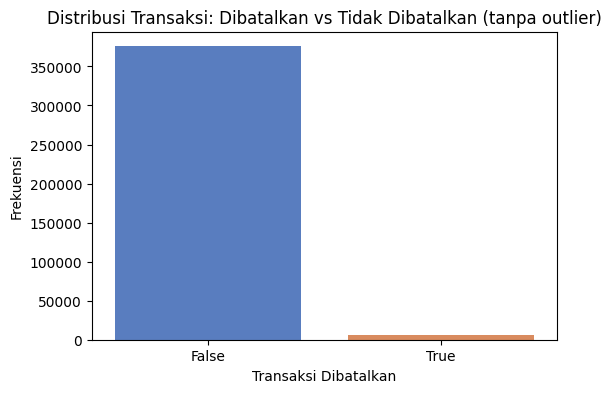

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_no_outliers['IsCancelled'], palette='muted')
plt.title('Distribusi Transaksi: Dibatalkan vs Tidak Dibatalkan (tanpa outlier)')
plt.xlabel('Transaksi Dibatalkan')
plt.ylabel('Frekuensi')
plt.show()


## EDA - Multivariate Analysis

In [ ]:
df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')


<ipython-input-30-42c802e723bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')


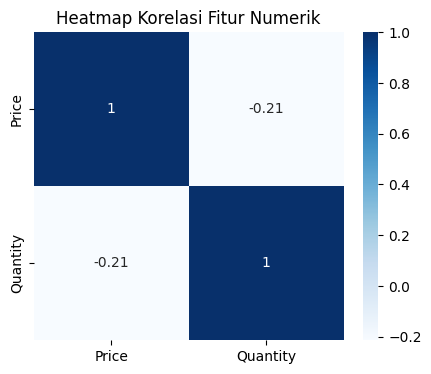

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Price', 'Quantity']
corr = df_no_outliers[numeric_cols].corr(method='pearson')

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()


Berdasarkan heatmap korelasi di atas, korelasi lemah antara Price dan Quantity menandakan keduanya tidak secara linear saling memengaruhi. Untuk memprediksi pembatalan transaksi, maka selanjutnya memerlukan fitur tambahan agar model dapat mempelajari pola yang lebih komprehensif dan relevan dengan pembatalan.

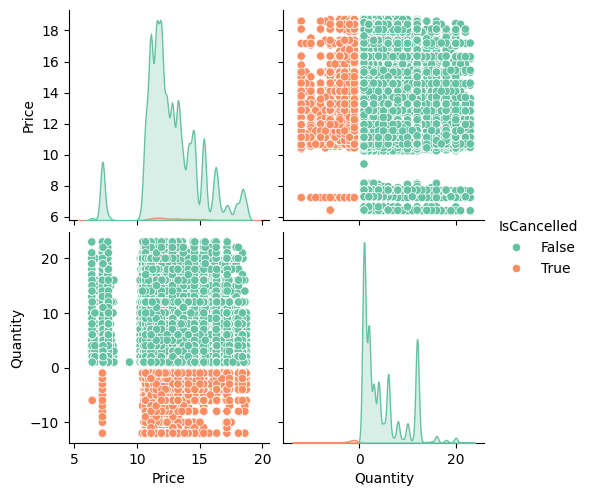

In [ ]:
sns.pairplot(df_no_outliers[['Price', 'Quantity', 'IsCancelled']],
             hue='IsCancelled',
             diag_kind='kde',
             palette='Set2')
plt.show()


1. Distribusi Price dan Quantity

- Price: Distribusinya cenderung terkonsentrasi di kisaran 3–5, dengan sedikit transaksi di atas 10. Dari segi warna (IsCancelled), tidak tampak perbedaan mencolok antara transaksi dibatalkan (oranye) dan tidak dibatalkan (hijau). Ini menunjukkan bahwa harga tidak secara langsung membedakan transaksi yang dibatalkan vs. tidak.

- Quantity: Terdapat dua kluster utama:
Quantity positif (hijau) untuk transaksi yang berjalan normal.
Quantity negatif (oranye) yang sangat terkait dengan transaksi dibatalkan. Nilai negatif umumnya menandakan retur atau koreksi stok setelah pembatalan.

2. Hubungan Price vs. Quantity

- Tidak Ada Pola Linear Kuat: Plot sebar (scatter plot) tidak memperlihatkan hubungan linear yang jelas antara Price dan Quantity. Hal ini sejalan dengan korelasi Pearson yang rendah.

- Cluster Negatif Quantity = IsCancelled: Hampir semua titik oranye (IsCancelled = True) berada di area Quantity < 0, mengindikasikan bahwa data Quantity negatif berperan sebagai penanda kuat adanya pembatalan (atau retur).

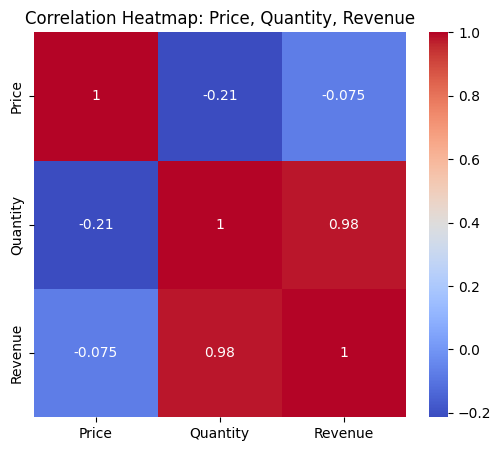

In [ ]:
# Heatmap Korelasi antar Fitur Numerik
numeric_cols = ['Price', 'Quantity', 'Revenue']
corr_matrix = df_no_outliers[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Price, Quantity, Revenue')
plt.show()

Quantity memiliki pengaruh dominan terhadap Revenue (korelasi tinggi,
0.98
0.98), sementara Price hanya memiliki hubungan linear yang sangat lemah terhadap Revenue (
−
0.075
−0.075).

Price dan Quantity juga berkorelasi negatif lemah (
−
0.21
−0.21), artinya ketika Price naik, Quantity mungkin sedikit turun, tetapi tidak terlalu signifikan.

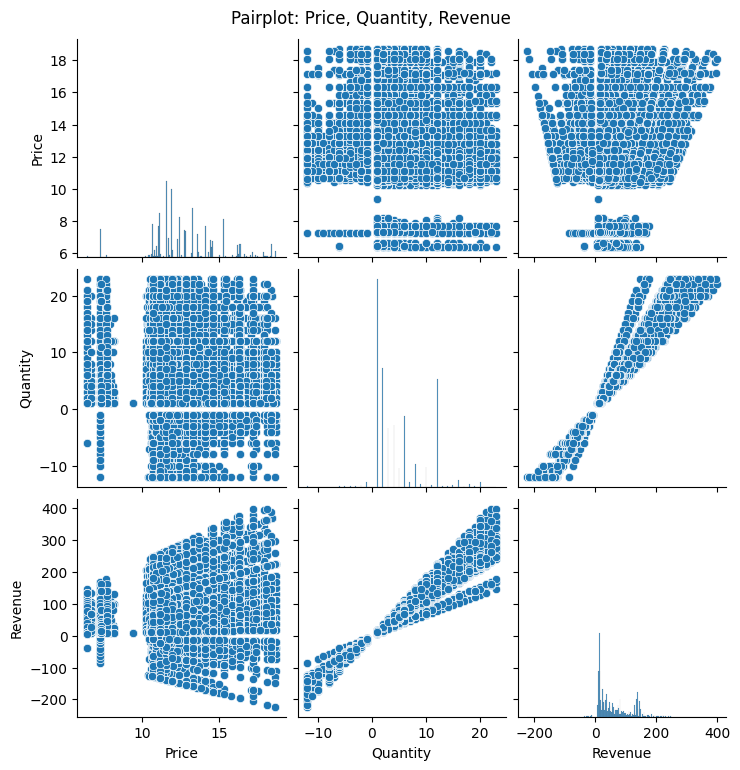

In [ ]:
# 6. Pairplot untuk Fitur Numerik
sns.pairplot(df_no_outliers[numeric_cols])
plt.suptitle('Pairplot: Price, Quantity, Revenue', y=1.02)
plt.show()

Quantity menjadi faktor penentu utama Revenue (karena korelasi sangat tinggi).

Price hanya memiliki hubungan linear yang sangat lemah dengan Revenue dan cenderung memengaruhi Quantity secara negatif lemah (barang mahal dibeli dalam jumlah sedikit, namun tidak terlalu signifikan).

Revenue bervariasi terutama dipengaruhi oleh seberapa banyak barang yang dibeli (Quantity)

# D. Data Preparation

## Menyiapkan data sebelum Modelling

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**a. Membuat Label Pembatalan dan Revenue**

In [ ]:
# Label True jika TransactionNo mengandung 'C' atau Quantity negatif
df_no_outliers['IsCancelled'] = df_no_outliers.apply(
    lambda row: True if ('C' in row['TransactionNo'] or row['Quantity'] < 0) else False,
    axis=1
)

# Hitung revenue: jika transaksi tidak dibatalkan, revenue = Price * Quantity; jika dibatalkan, revenue = 0
df_no_outliers['Revenue'] = df_no_outliers.apply(
    lambda row: row['Price'] * row['Quantity'] if not row['IsCancelled'] else 0,
    axis=1
)

<ipython-input-35-830ab15c6b98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['IsCancelled'] = df_no_outliers.apply(
<ipython-input-35-830ab15c6b98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Revenue'] = df_no_outliers.apply(


**b. Mengambil Hanya Transaksi yang Berhasil (non-cancelled)**

In [ ]:
# Untuk forecasting revenue, kita hanya akumulasi transaksi yang tidak dibatalkan.
df_success = df_no_outliers[~df_no_outliers['IsCancelled']].copy()
print("Jumlah transaksi yang berhasil:", df_success.shape[0])

Jumlah transaksi yang berhasil: 375655


**c. Agregasi Revenue Harian**

In [ ]:
# Kelompokkan data berdasarkan Date dan hitung total revenue per hari
daily_revenue = df_success.groupby('Date')['Revenue'].sum().reset_index()
daily_revenue = daily_revenue.sort_values('Date')
print("Contoh data revenue harian:")
print(daily_revenue.head())

Contoh data revenue harian:
        Date    Revenue
0 2018-12-01  121746.64
1 2018-12-02  114368.62
2 2018-12-03   86371.83
3 2018-12-05  109667.73
4 2018-12-06  146821.14


**d. Pembuatan Fitur Time Series**

In [ ]:
# Buat fitur lag untuk menangkap dependensi waktu, misalnya lag 1, 7, dan 30 hari
daily_revenue['Lag1'] = daily_revenue['Revenue'].shift(1)
daily_revenue['Lag7'] = daily_revenue['Revenue'].shift(7)
daily_revenue['Lag30'] = daily_revenue['Revenue'].shift(30)

# Buat fitur moving average: rata-rata 7 hari dan 30 hari untuk mendeteksi trend
daily_revenue['MA7'] = daily_revenue['Revenue'].rolling(window=7).mean()
daily_revenue['MA30'] = daily_revenue['Revenue'].rolling(window=30).mean()

# Hapus baris yang mengandung NA (akibat shift dan rolling)
daily_revenue.dropna(inplace=True)
print("Data revenue harian dengan fitur time series:")
print(daily_revenue.head())

Data revenue harian dengan fitur time series:
         Date    Revenue       Lag1      Lag7      Lag30           MA7  \
30 2019-01-16   21303.36   62716.43  92657.88  121746.64  61928.104286   
31 2019-01-17  107405.82   21303.36  51156.38  114368.62  69963.738571   
32 2019-01-18   45778.38  107405.82  86927.25   86371.83  64085.328571   
33 2019-01-19   60537.23   45778.38  71243.66  109667.73  62555.838571   
34 2019-01-20   64372.72   60537.23  75736.94  146821.14  60932.378571   

            MA30  
30  77711.133333  
31  77479.040000  
32  76125.925000  
33  74488.241667  
34  71739.961000  


**e. Scaling Fitur Numerik**

In [ ]:
# Kita akan menskalakan fitur-fitur numerik untuk membantu model training
features_to_scale = ['Revenue', 'Lag1', 'Lag7', 'Lag30', 'MA7', 'MA30']
scaler = StandardScaler()
daily_revenue[features_to_scale] = scaler.fit_transform(daily_revenue[features_to_scale])


**f. Split Data Menjadi Training dan Testing Set**

In [ ]:
# Karena data time series harus mempertahankan urutan waktu, kita tidak mengacak data (shuffle=False)
X = daily_revenue.drop(['Revenue', 'Date'], axis=1)  # Gunakan semua fitur kecuali target dan Date
y = daily_revenue['Revenue']  # Target adalah revenue harian

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # pastikan data tetap terurut waktu
)

print("Dimensi Training Set:", X_train.shape)
print("Dimensi Testing Set:", X_test.shape)

Dimensi Training Set: (220, 5)
Dimensi Testing Set: (55, 5)


# E. Model Development
* Random Forest Regressor
* ARIMA
* LSTM

## **Random Forest Regressor**

Random Forest Regressor Performance:
Training MAE: 0.1856, RMSE: 0.2353, R2: 0.8877
Testing MAE: 0.7630, RMSE: 1.0317, R2: 0.5604


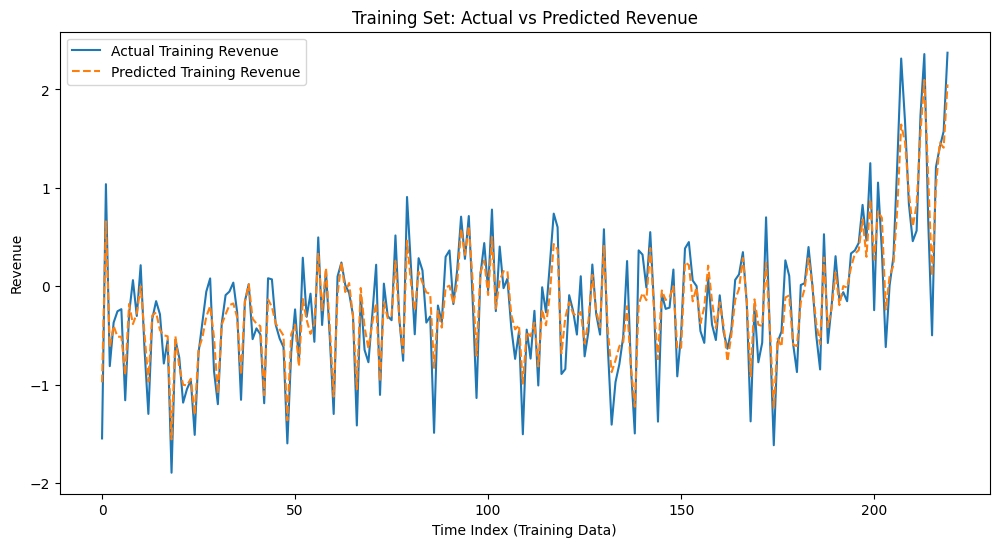

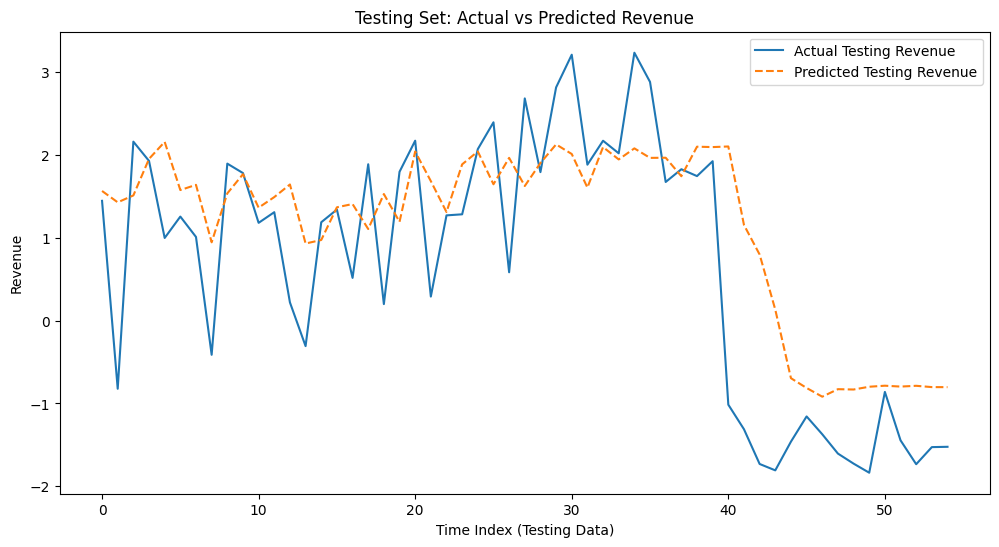

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Buat model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk data training dan testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Hitung metrik evaluasi
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Regressor Performance:")
print(f"Training MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")

# Visualisasi hasil forecasting untuk Training Set
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Training Revenue')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Training Revenue', linestyle='--')
plt.title('Training Set: Actual vs Predicted Revenue')
plt.xlabel('Time Index (Training Data)')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Visualisasi hasil forecasting untuk Testing Set
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Testing Revenue')
plt.plot(np.arange(len(y_test_pred)), y_test_pred, label='Predicted Testing Revenue', linestyle='--')
plt.title('Testing Set: Actual vs Predicted Revenue')
plt.xlabel('Time Index (Testing Data)')
plt.ylabel('Revenue')
plt.legend()
plt.show()


## **ARIMA**

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  220
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -199.596
Date:                Tue, 25 Mar 2025   AIC                            405.192
Time:                        16:26:45   BIC                            415.359
Sample:                             0   HQIC                           409.298
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1397      0.081      1.727      0.084      -0.019       0.298
ma.L1         -0.8829      0.036    -24.770      0.000      -0.953      -0.813
sigma2         0.3603      0.032     11.174      0.0

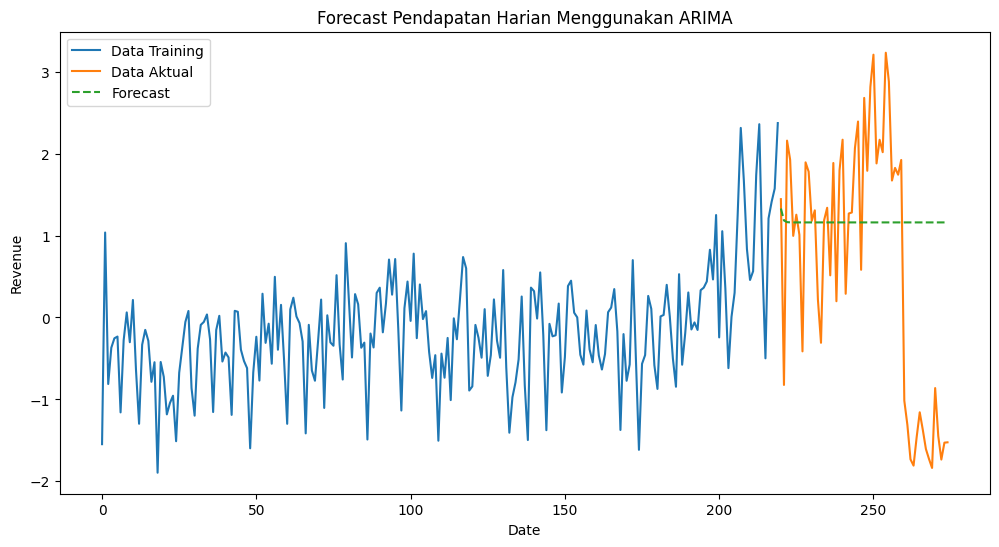

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data secara kronologis (misalnya, 80% training, 20% testing)
n_total = len(daily_revenue)
n_train = int(0.8 * n_total)
train, test = daily_revenue.iloc[:n_train], daily_revenue.iloc[n_train:]

# Fit ARIMA pada data training
# Pemilihan order (p,d,q) awal: (1,1,1) - Anda dapat melakukan tuning lebih lanjut.
model_arima = ARIMA(train['Revenue'], order=(1,1,1))
model_fit = model_arima.fit()
print(model_fit.summary())

# Forecast revenue pada periode testing
forecast = model_fit.forecast(steps=len(test))

# Visualisasi hasil forecasting
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Revenue'], label='Data Training')
plt.plot(test.index, test['Revenue'], label='Data Aktual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Forecast Pendapatan Harian Menggunakan ARIMA')
plt.legend()
plt.show()


## **LSTM**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.5543 - val_loss: 2.7102
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4529 - val_loss: 2.5524
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5138 - val_loss: 2.4005
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4280 - val_loss: 2.2492
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4702 - val_loss: 2.0997
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4235 - val_loss: 1.9503
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4489 - val_loss: 1.8115
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4223 - val_loss: 1.6891
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3704 - val_loss: 1.5653
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3592 - val_loss: 1.4628
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3504 - val_loss: 1.3563
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3511 - val_loss: 1.2617
Epoch 13/50


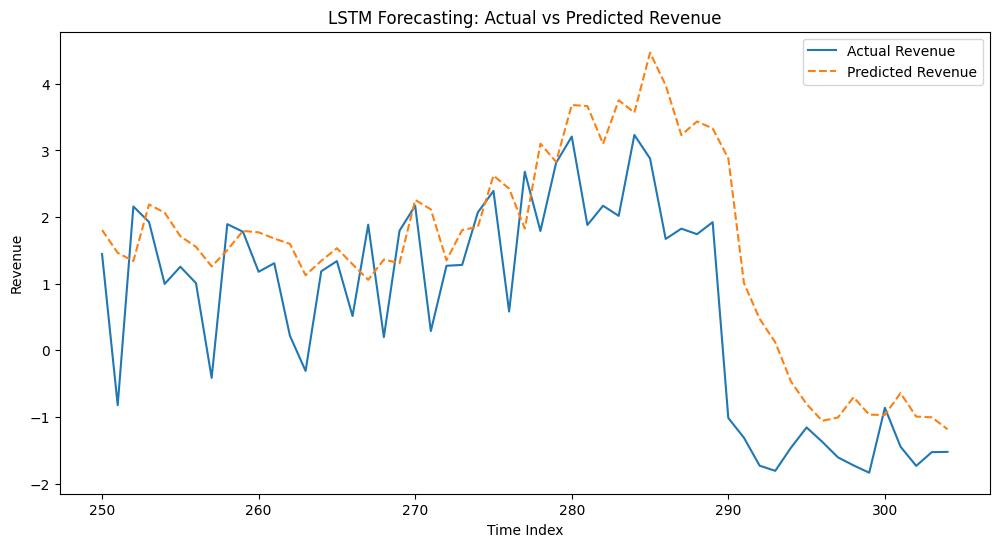

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Fungsi untuk mereshape data agar sesuai dengan input LSTM: (samples, time_steps, features)
def reshape_for_lstm(X, time_steps=1):
    return np.reshape(X, (X.shape[0], time_steps, X.shape[1]))

# Misalnya, kita gunakan time_steps = 1 untuk simplicity
X_train_lstm = reshape_for_lstm(X_train.values, time_steps=1)
X_test_lstm = reshape_for_lstm(X_test.values, time_steps=1)

# Bangun model LSTM
model_lstm = Sequential()
# Tambahkan layer LSTM dengan 50 unit dan aktivasi ReLU
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
# Layer output dengan 1 neuron (karena target adalah revenue)
model_lstm.add(Dense(1))

# Kompilasi model menggunakan optimizer Adam dan loss MSE
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Latih model LSTM
history = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Prediksi dengan LSTM
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Evaluasi model LSTM
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

print("LSTM Model Performance:")
print(f"MAE: {mae_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")

# Visualisasi hasil forecasting untuk Testing Set
plt.figure(figsize=(12,6))
# Jika y_test merupakan Series dengan index berupa tanggal, gunakan index untuk plotting;
# jika tidak, gunakan range(len(y_test))
if hasattr(y_test, 'index'):
    plt.plot(y_test.index, y_test, label='Actual Revenue')
    plt.plot(y_test.index, y_pred_lstm, label='Predicted Revenue', linestyle='--')
else:
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Revenue')
    plt.plot(np.arange(len(y_pred_lstm)), y_pred_lstm, label='Predicted Revenue', linestyle='--')

plt.xlabel('Time Index')
plt.ylabel('Revenue')
plt.title('LSTM Forecasting: Actual vs Predicted Revenue')
plt.legend()
plt.show()


# EVALUASI

## **Random Forest Regressor**

In [ ]:
# Hitung metrik evaluasi
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Regressor Performance:")
print(f"Training MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")


Random Forest Regressor Performance:
Training MAE: 0.1856, RMSE: 0.2353, R2: 0.8877
Testing MAE: 0.7630, RMSE: 1.0317, R2: 0.5604


## **ARIMA**

In [ ]:
# Evaluasi model dengan MAE, RMSE, dan MAPE
mae = mean_absolute_error(test['Revenue'], forecast)
rmse = np.sqrt(mean_squared_error(test['Revenue'], forecast))
mape = np.mean(np.abs((test['Revenue'] - forecast) / test['Revenue'])) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")


MAE: 1.3104
RMSE: 1.6240
MAPE: 115.47%


## **LSTM**

In [ ]:
# Evaluasi model LSTM
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

print("LSTM Model Performance:")
print(f"MAE: {mae_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")

LSTM Model Performance:
MAE: 0.9620
RMSE: 1.2343


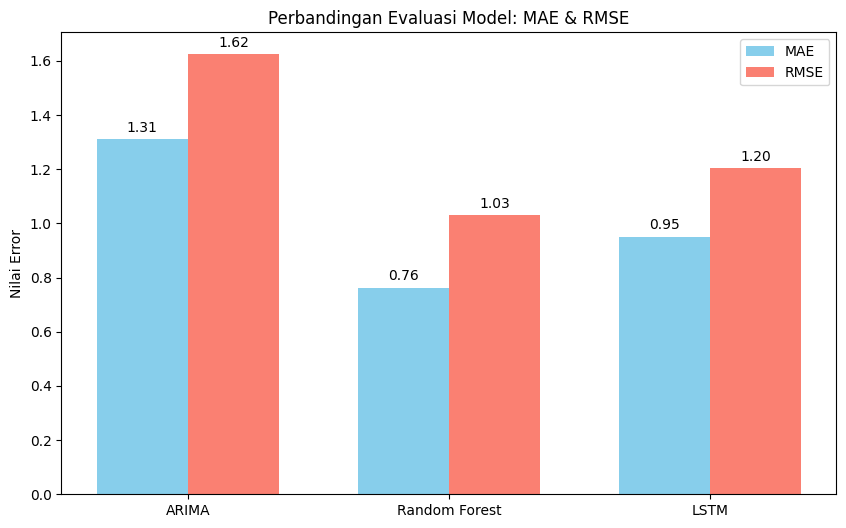

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data metrik evaluasi (Testing) untuk masing-masing algoritma
algorithms = ['ARIMA', 'Random Forest', 'LSTM']
mae_values = [1.3104, 0.7630, 0.9514]
rmse_values = [1.6240, 1.0317, 1.2049]

# Atur posisi x untuk setiap algoritma
x = np.arange(len(algorithms))
width = 0.35  # Lebar setiap bar

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='skyblue')
bar2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')

# Pengaturan sumbu dan judul
ax.set_ylabel('Nilai Error')
ax.set_title('Perbandingan Evaluasi Model: MAE & RMSE')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Fungsi untuk menambahkan label pada tiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # offset vertical 3 points
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()
